
# Stock Market Prediction And Forecasting using stacked LSTM

## Process

1. We will collect the stock Data - AAPL
2. Preprocess the data - Train and Test
3. Create an Stacked LSTM and Model
4. Predict the test data and plot the output
5. Predict the future 30 days and plot the output



# API KEY for this project : 

-  Find your api key from here : https://api.tiingo.com/

# Data Collection and libraries

In [44]:
import pandas_datareader as pdr
import os
# TIINGO_API_KEY = 'Find your from given website'
# API KEY, you can find yours by upper link

Documentation of **pandas_datareader** : https://pandas-datareader.readthedocs.io/en/latest/

In [45]:
# df = pdr.get_data_tiingo('AAPL', api_key='paste your API key here')

In [46]:
# df.to_csv('AAPL.csv')

## Run above code first before running further cells.

# Let's Start

In [47]:
import pandas as pd

In [83]:
df = pd.read_csv('AAPL.csv')

In [84]:
# Top 10 rows of df
df.head(10)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-10-03 00:00:00+00:00,112.52,113.05,112.28,112.71,21701760,26.376689,26.500930,26.320428,26.421228,86807040,0.0,1.0
1,AAPL,2016-10-04 00:00:00+00:00,113.00,114.31,112.63,113.06,29736835,26.489209,26.796297,26.402475,26.503274,118947340,0.0,1.0
2,AAPL,2016-10-05 00:00:00+00:00,113.05,113.66,112.69,113.40,21453089,26.500930,26.643925,26.416540,26.582976,85812356,0.0,1.0
3,AAPL,2016-10-06 00:00:00+00:00,113.89,114.34,113.13,113.70,28779313,26.697841,26.803329,26.519684,26.653302,115117252,0.0,1.0
4,AAPL,2016-10-07 00:00:00+00:00,114.06,114.56,113.51,114.31,24358443,26.737692,26.854901,26.608762,26.796297,97433772,0.0,1.0
5,AAPL,2016-10-10 00:00:00+00:00,116.05,116.75,114.72,115.02,36235956,27.204184,27.368276,26.892408,26.962733,144943824,0.0,1.0
6,AAPL,2016-10-11 00:00:00+00:00,116.30,118.69,116.20,117.70,64041043,27.262788,27.823046,27.239346,27.590973,256164172,0.0,1.0
7,AAPL,2016-10-12 00:00:00+00:00,117.34,117.98,116.75,117.35,37586787,27.506582,27.656610,27.368276,27.508927,150347148,0.0,1.0
8,AAPL,2016-10-13 00:00:00+00:00,116.98,117.44,115.72,116.79,35192406,27.422192,27.530024,27.126826,27.377653,140769624,0.0,1.0
9,AAPL,2016-10-14 00:00:00+00:00,117.63,118.17,117.13,117.88,35652191,27.574564,27.701149,27.457355,27.633168,142608764,0.0,1.0


In [85]:
# last 10 rows
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-09-23 00:00:00+00:00,146.83,147.0800,145.64,146.65,64838170,146.83,147.0800,145.64,146.65,64838170,0.0,1.0
1253,AAPL,2021-09-24 00:00:00+00:00,146.92,147.4701,145.56,145.66,53477869,146.92,147.4701,145.56,145.66,53477869,0.0,1.0
1254,AAPL,2021-09-27 00:00:00+00:00,145.37,145.9600,143.82,145.47,74150729,145.37,145.9600,143.82,145.47,74150729,0.0,1.0
1255,AAPL,2021-09-28 00:00:00+00:00,141.91,144.7500,141.69,143.25,108972340,141.91,144.7500,141.69,143.25,108972340,0.0,1.0
1256,AAPL,2021-09-29 00:00:00+00:00,142.83,144.4500,142.03,142.47,74602044,142.83,144.4500,142.03,142.47,74602044,0.0,1.0


In [86]:
df1 = df.reset_index()['close']

In [87]:
df1.shape

(1257,)

In [88]:
df1.head()

0    112.52
1    113.00
2    113.05
3    113.89
4    114.06
Name: close, dtype: float64

# Visualizing the data

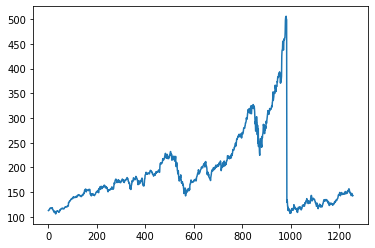

In [89]:
import matplotlib.pyplot as plt
plt.plot(df1)

- Google stock is bullish according to above chart

# Scaling the data

- LSTM are sensitive to the scale of the data, so we apply MinMaxScaler

In [90]:
df1

0       112.52
1       113.00
2       113.05
3       113.89
4       114.06
         ...  
1252    146.83
1253    146.92
1254    145.37
1255    141.91
1256    142.83
Name: close, Length: 1257, dtype: float64

In [91]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [92]:
df1.shape

(1257, 1)

In [93]:
df1

array([[0.01700884],
       [0.0182077 ],
       [0.01833258],
       ...,
       [0.0990559 ],
       [0.09041411],
       [0.09271192]])

# Train-Test-Split

- Here our dataset is in **TimeSeries**, so we will split data into **train-test-split** according to Date

In [94]:
#Splitting dataset into train and test split
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [95]:
# Convert an array of values into dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] ## i=0,1,2,3..
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [96]:
#reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [97]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [98]:
print(X_test.shape), print(y_test.shape)

(339, 100)
(339,)


(None, None)

# Creating LSTM Model

In [99]:
#reshape input to be [samples, time_steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
# Coverting X_train & y_train into 3 dimensions

In [100]:
print(X_train.shape), print(y_train.shape)

(716, 100, 1)
(716,)


(None, None)

## Create the stacked LSTM Model

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [102]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [103]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [104]:
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=100, batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 19s 537ms/step - loss: 0.0261 - val_loss: 0.0326
Epoch 2/100
12/12 [==============================] - 4s 293ms/step - loss: 0.0036 - val_loss: 0.0281
Epoch 3/100
12/12 [==============================] - 4s 333ms/step - loss: 0.0025 - val_loss: 0.0243
Epoch 4/100
12/12 [==============================] - 4s 324ms/step - loss: 0.0013 - val_loss: 0.0216
Epoch 5/100
12/12 [==============================] - 3s 295ms/step - loss: 7.4578e-04 - val_loss: 0.0263
Epoch 6/100
12/12 [==============================] - 4s 314ms/step - loss: 6.1545e-04 - val_loss: 0.0254
Epoch 7/100
12/12 [==============================] - 3s 286ms/step - loss: 5.8655e-04 - val_loss: 0.0238
Epoch 8/100
12/12 [==============================] - 4s 297ms/step - loss: 5.0711e-04 - val_loss: 0.0258
Epoch 9/100
12/12 [==============================] - 4s 319ms/step - loss: 4.9757e-04 - val_loss: 0.0250
Epoch 10/100
12/12 [==============================] - 5s 403ms/step - 

# Predictions and Evaluation of the model

In [105]:
#Let's do the predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [106]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [107]:
#Calculate Root Mean Squared Error (RMSE) performance matrix
import math
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_train, train_predict)
test_rmse = math.sqrt(test_mse)
print("Root Mean Squared of train: ",test_rmse)

Root Mean Squared of train:  187.67053163017803


In [108]:
#test data rmse
test_mse = mean_squared_error(y_test, test_predict)
test_rsme= math.sqrt(test_mse)
print("Root Mean squared of test: ", test_rsme)

Root Mean squared of test:  221.6854341299227


# Visualization

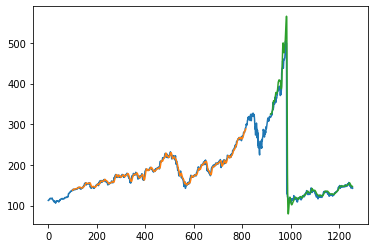

In [109]:
# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [110]:
len(test_data)

440

In [111]:
X_input = test_data[341:].reshape(1,-1)
X_input.shape

(1, 99)

In [112]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [113]:
temp_input

[0.050452070532993665,
 0.04260952095509268,
 0.04810430091413159,
 0.054298416504320934,
 0.05135121634447276,
 0.04780458564363854,
 0.04740496528298116,
 0.05394874868874572,
 0.04925320945102157,
 0.05342424696538289,
 0.05292472151456118,
 0.05279984015185574,
 0.048878565362905246,
 0.047205155102652496,
 0.04638093810879668,
 0.04832908736700137,
 0.04453269394075632,
 0.0504021179879115,
 0.05042709426045261,
 0.0525251011539038,
 0.05349917578300617,
 0.05095159598381538,
 0.05404865377891005,
 0.06186622708426992,
 0.05976822019081868,
 0.061042010090414156,
 0.0651381187871522,
 0.06181627453918781,
 0.06641190868674762,
 0.07060792247365,
 0.06990858684249962,
 0.06918427493880813,
 0.06843498676257559,
 0.07260602427693691,
 0.07647734652080529,
 0.07805085169089365,
 0.07882511613966736,
 0.08554373345321947,
 0.09068884559668317,
 0.09705779509466006,
 0.09373595084669567,
 0.09840651381187876,
 0.09688296118687245,
 0.09973025625655624,
 0.10849692791847748,
 0.10682351

In [117]:
#demonstarte predicion for next 10 days
from numpy import array

lst_op = []
n_steps = 100
i = 0
while(i<30):
    if(len(temp_input)>100):
        print(temp_input)
        X_input = np.array(temp_input[1:])
        print("{} day input {}".format(1, X_input))
        X_input = X_input.reshape(1,-1)
        X_input = X_input.reshape((1, n_steps, 1))
        print(X_input)
        yhat = model.predict(X_input, verbose=0)
        print("{} day input {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        print(temp_input)
        lst_op.extend(yhat.tolist())
        i = i+1
    else:
        X_input = X_input.reshape((1, n_steps, 1))
        yhat = model.predict(X_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_op.extend(yhat.tolist())
        i = i+1

[0.050452070532993665, 0.04260952095509268, 0.04810430091413159, 0.054298416504320934, 0.05135121634447276, 0.04780458564363854, 0.04740496528298116, 0.05394874868874572, 0.04925320945102157, 0.05342424696538289, 0.05292472151456118, 0.05279984015185574, 0.048878565362905246, 0.047205155102652496, 0.04638093810879668, 0.04832908736700137, 0.04453269394075632, 0.0504021179879115, 0.05042709426045261, 0.0525251011539038, 0.05349917578300617, 0.05095159598381538, 0.05404865377891005, 0.06186622708426992, 0.05976822019081868, 0.061042010090414156, 0.0651381187871522, 0.06181627453918781, 0.06641190868674762, 0.07060792247365, 0.06990858684249962, 0.06918427493880813, 0.06843498676257559, 0.07260602427693691, 0.07647734652080529, 0.07805085169089365, 0.07882511613966736, 0.08554373345321947, 0.09068884559668317, 0.09705779509466006, 0.09373595084669567, 0.09840651381187876, 0.09688296118687245, 0.09973025625655624, 0.10849692791847748, 0.10682351765822468, 0.1016034766971377, 0.091762825315

1 day input [[0.10215618]]
[0.04810430091413159, 0.054298416504320934, 0.05135121634447276, 0.04780458564363854, 0.04740496528298116, 0.05394874868874572, 0.04925320945102157, 0.05342424696538289, 0.05292472151456118, 0.05279984015185574, 0.048878565362905246, 0.047205155102652496, 0.04638093810879668, 0.04832908736700137, 0.04453269394075632, 0.0504021179879115, 0.05042709426045261, 0.0525251011539038, 0.05349917578300617, 0.05095159598381538, 0.05404865377891005, 0.06186622708426992, 0.05976822019081868, 0.061042010090414156, 0.0651381187871522, 0.06181627453918781, 0.06641190868674762, 0.07060792247365, 0.06990858684249962, 0.06918427493880813, 0.06843498676257559, 0.07260602427693691, 0.07647734652080529, 0.07805085169089365, 0.07882511613966736, 0.08554373345321947, 0.09068884559668317, 0.09705779509466006, 0.09373595084669567, 0.09840651381187876, 0.09688296118687245, 0.09973025625655624, 0.10849692791847748, 0.10682351765822468, 0.1016034766971377, 0.09176282531594981, 0.1010040

3 day input [[0.1039666]]
[0.05135121634447276, 0.04780458564363854, 0.04740496528298116, 0.05394874868874572, 0.04925320945102157, 0.05342424696538289, 0.05292472151456118, 0.05279984015185574, 0.048878565362905246, 0.047205155102652496, 0.04638093810879668, 0.04832908736700137, 0.04453269394075632, 0.0504021179879115, 0.05042709426045261, 0.0525251011539038, 0.05349917578300617, 0.05095159598381538, 0.05404865377891005, 0.06186622708426992, 0.05976822019081868, 0.061042010090414156, 0.0651381187871522, 0.06181627453918781, 0.06641190868674762, 0.07060792247365, 0.06990858684249962, 0.06918427493880813, 0.06843498676257559, 0.07260602427693691, 0.07647734652080529, 0.07805085169089365, 0.07882511613966736, 0.08554373345321947, 0.09068884559668317, 0.09705779509466006, 0.09373595084669567, 0.09840651381187876, 0.09688296118687245, 0.09973025625655624, 0.10849692791847748, 0.10682351765822468, 0.1016034766971377, 0.09176282531594981, 0.10100404615615166, 0.09913082571557025, 0.102627503

5 day input [[0.10578302]]
[0.04740496528298116, 0.05394874868874572, 0.04925320945102157, 0.05342424696538289, 0.05292472151456118, 0.05279984015185574, 0.048878565362905246, 0.047205155102652496, 0.04638093810879668, 0.04832908736700137, 0.04453269394075632, 0.0504021179879115, 0.05042709426045261, 0.0525251011539038, 0.05349917578300617, 0.05095159598381538, 0.05404865377891005, 0.06186622708426992, 0.05976822019081868, 0.061042010090414156, 0.0651381187871522, 0.06181627453918781, 0.06641190868674762, 0.07060792247365, 0.06990858684249962, 0.06918427493880813, 0.06843498676257559, 0.07260602427693691, 0.07647734652080529, 0.07805085169089365, 0.07882511613966736, 0.08554373345321947, 0.09068884559668317, 0.09705779509466006, 0.09373595084669567, 0.09840651381187876, 0.09688296118687245, 0.09973025625655624, 0.10849692791847748, 0.10682351765822468, 0.1016034766971377, 0.09176282531594981, 0.10100404615615166, 0.09913082571557025, 0.1026275038713223, 0.1070233278385534, 0.1080973075

7 day input [[0.10733202]]
[0.04925320945102157, 0.05342424696538289, 0.05292472151456118, 0.05279984015185574, 0.048878565362905246, 0.047205155102652496, 0.04638093810879668, 0.04832908736700137, 0.04453269394075632, 0.0504021179879115, 0.05042709426045261, 0.0525251011539038, 0.05349917578300617, 0.05095159598381538, 0.05404865377891005, 0.06186622708426992, 0.05976822019081868, 0.061042010090414156, 0.0651381187871522, 0.06181627453918781, 0.06641190868674762, 0.07060792247365, 0.06990858684249962, 0.06918427493880813, 0.06843498676257559, 0.07260602427693691, 0.07647734652080529, 0.07805085169089365, 0.07882511613966736, 0.08554373345321947, 0.09068884559668317, 0.09705779509466006, 0.09373595084669567, 0.09840651381187876, 0.09688296118687245, 0.09973025625655624, 0.10849692791847748, 0.10682351765822468, 0.1016034766971377, 0.09176282531594981, 0.10100404615615166, 0.09913082571557025, 0.1026275038713223, 0.1070233278385534, 0.1080973075578201, 0.10255257505369902, 0.09808182226

9 day input [[0.10866436]]
[0.05292472151456118, 0.05279984015185574, 0.048878565362905246, 0.047205155102652496, 0.04638093810879668, 0.04832908736700137, 0.04453269394075632, 0.0504021179879115, 0.05042709426045261, 0.0525251011539038, 0.05349917578300617, 0.05095159598381538, 0.05404865377891005, 0.06186622708426992, 0.05976822019081868, 0.061042010090414156, 0.0651381187871522, 0.06181627453918781, 0.06641190868674762, 0.07060792247365, 0.06990858684249962, 0.06918427493880813, 0.06843498676257559, 0.07260602427693691, 0.07647734652080529, 0.07805085169089365, 0.07882511613966736, 0.08554373345321947, 0.09068884559668317, 0.09705779509466006, 0.09373595084669567, 0.09840651381187876, 0.09688296118687245, 0.09973025625655624, 0.10849692791847748, 0.10682351765822468, 0.1016034766971377, 0.09176282531594981, 0.10100404615615166, 0.09913082571557025, 0.1026275038713223, 0.1070233278385534, 0.1080973075578201, 0.10255257505369902, 0.0980818222688446, 0.09973025625655624, 0.100279734252

12 day input [[0.11046939]]
[0.047205155102652496, 0.04638093810879668, 0.04832908736700137, 0.04453269394075632, 0.0504021179879115, 0.05042709426045261, 0.0525251011539038, 0.05349917578300617, 0.05095159598381538, 0.05404865377891005, 0.06186622708426992, 0.05976822019081868, 0.061042010090414156, 0.0651381187871522, 0.06181627453918781, 0.06641190868674762, 0.07060792247365, 0.06990858684249962, 0.06918427493880813, 0.06843498676257559, 0.07260602427693691, 0.07647734652080529, 0.07805085169089365, 0.07882511613966736, 0.08554373345321947, 0.09068884559668317, 0.09705779509466006, 0.09373595084669567, 0.09840651381187876, 0.09688296118687245, 0.09973025625655624, 0.10849692791847748, 0.10682351765822468, 0.1016034766971377, 0.09176282531594981, 0.10100404615615166, 0.09913082571557025, 0.1026275038713223, 0.1070233278385534, 0.1080973075578201, 0.10255257505369902, 0.0980818222688446, 0.09973025625655624, 0.10027973425246023, 0.0994305409860633, 0.10402617513362311, 0.1030021479594

  [0.11105704]]]
14 day input [[0.11164837]]
[0.04832908736700137, 0.04453269394075632, 0.0504021179879115, 0.05042709426045261, 0.0525251011539038, 0.05349917578300617, 0.05095159598381538, 0.05404865377891005, 0.06186622708426992, 0.05976822019081868, 0.061042010090414156, 0.0651381187871522, 0.06181627453918781, 0.06641190868674762, 0.07060792247365, 0.06990858684249962, 0.06918427493880813, 0.06843498676257559, 0.07260602427693691, 0.07647734652080529, 0.07805085169089365, 0.07882511613966736, 0.08554373345321947, 0.09068884559668317, 0.09705779509466006, 0.09373595084669567, 0.09840651381187876, 0.09688296118687245, 0.09973025625655624, 0.10849692791847748, 0.10682351765822468, 0.1016034766971377, 0.09176282531594981, 0.10100404615615166, 0.09913082571557025, 0.1026275038713223, 0.1070233278385534, 0.1080973075578201, 0.10255257505369902, 0.0980818222688446, 0.09973025625655624, 0.10027973425246023, 0.0994305409860633, 0.10402617513362311, 0.10300214795943852, 0.10327688695739051,

17 day input [[0.11347815]]
[0.05042709426045261, 0.0525251011539038, 0.05349917578300617, 0.05095159598381538, 0.05404865377891005, 0.06186622708426992, 0.05976822019081868, 0.061042010090414156, 0.0651381187871522, 0.06181627453918781, 0.06641190868674762, 0.07060792247365, 0.06990858684249962, 0.06918427493880813, 0.06843498676257559, 0.07260602427693691, 0.07647734652080529, 0.07805085169089365, 0.07882511613966736, 0.08554373345321947, 0.09068884559668317, 0.09705779509466006, 0.09373595084669567, 0.09840651381187876, 0.09688296118687245, 0.09973025625655624, 0.10849692791847748, 0.10682351765822468, 0.1016034766971377, 0.09176282531594981, 0.10100404615615166, 0.09913082571557025, 0.1026275038713223, 0.1070233278385534, 0.1080973075578201, 0.10255257505369902, 0.0980818222688446, 0.09973025625655624, 0.10027973425246023, 0.0994305409860633, 0.10402617513362311, 0.10300214795943852, 0.10327688695739051, 0.10097906988361055, 0.10085418852090516, 0.0996303511663919, 0.10027973425246

19 day input [[0.11475574]]
[0.05349917578300617, 0.05095159598381538, 0.05404865377891005, 0.06186622708426992, 0.05976822019081868, 0.061042010090414156, 0.0651381187871522, 0.06181627453918781, 0.06641190868674762, 0.07060792247365, 0.06990858684249962, 0.06918427493880813, 0.06843498676257559, 0.07260602427693691, 0.07647734652080529, 0.07805085169089365, 0.07882511613966736, 0.08554373345321947, 0.09068884559668317, 0.09705779509466006, 0.09373595084669567, 0.09840651381187876, 0.09688296118687245, 0.09973025625655624, 0.10849692791847748, 0.10682351765822468, 0.1016034766971377, 0.09176282531594981, 0.10100404615615166, 0.09913082571557025, 0.1026275038713223, 0.1070233278385534, 0.1080973075578201, 0.10255257505369902, 0.0980818222688446, 0.09973025625655624, 0.10027973425246023, 0.0994305409860633, 0.10402617513362311, 0.10300214795943852, 0.10327688695739051, 0.10097906988361055, 0.10085418852090516, 0.0996303511663919, 0.10027973425246023, 0.10784754483240916, 0.1083720465557

 0.11347815 0.11411131 0.11475574 0.11541004]
[[[0.05404865]
  [0.06186623]
  [0.05976822]
  [0.06104201]
  [0.06513812]
  [0.06181627]
  [0.06641191]
  [0.07060792]
  [0.06990859]
  [0.06918427]
  [0.06843499]
  [0.07260602]
  [0.07647735]
  [0.07805085]
  [0.07882512]
  [0.08554373]
  [0.09068885]
  [0.0970578 ]
  [0.09373595]
  [0.09840651]
  [0.09688296]
  [0.09973026]
  [0.10849693]
  [0.10682352]
  [0.10160348]
  [0.09176283]
  [0.10100405]
  [0.09913083]
  [0.1026275 ]
  [0.10702333]
  [0.10809731]
  [0.10255258]
  [0.09808182]
  [0.09973026]
  [0.10027973]
  [0.09943054]
  [0.10402618]
  [0.10300215]
  [0.10327689]
  [0.10097907]
  [0.10085419]
  [0.09963035]
  [0.10027973]
  [0.10784754]
  [0.10837205]
  [0.11341725]
  [0.11109446]
  [0.10152855]
  [0.10237774]
  [0.10609921]
  [0.1098956 ]
  [0.10967081]
  [0.1065238 ]
  [0.10447575]
  [0.10712323]
  [0.11841251]
  [0.11519057]
  [0.11688896]
  [0.11973625]
  [0.12135971]
  [0.12732904]
  [0.12338279]
  [0.12078525]
  [0.1080

22 day input [[0.11674047]]
[0.06186622708426992, 0.05976822019081868, 0.061042010090414156, 0.0651381187871522, 0.06181627453918781, 0.06641190868674762, 0.07060792247365, 0.06990858684249962, 0.06918427493880813, 0.06843498676257559, 0.07260602427693691, 0.07647734652080529, 0.07805085169089365, 0.07882511613966736, 0.08554373345321947, 0.09068884559668317, 0.09705779509466006, 0.09373595084669567, 0.09840651381187876, 0.09688296118687245, 0.09973025625655624, 0.10849692791847748, 0.10682351765822468, 0.1016034766971377, 0.09176282531594981, 0.10100404615615166, 0.09913082571557025, 0.1026275038713223, 0.1070233278385534, 0.1080973075578201, 0.10255257505369902, 0.0980818222688446, 0.09973025625655624, 0.10027973425246023, 0.0994305409860633, 0.10402617513362311, 0.10300214795943852, 0.10327688695739051, 0.10097906988361055, 0.10085418852090516, 0.0996303511663919, 0.10027973425246023, 0.10784754483240916, 0.10837204655577198, 0.1134172536090714, 0.11109446026275038, 0.10152854787951

24 day input [[0.1180856]]
[0.061042010090414156, 0.0651381187871522, 0.06181627453918781, 0.06641190868674762, 0.07060792247365, 0.06990858684249962, 0.06918427493880813, 0.06843498676257559, 0.07260602427693691, 0.07647734652080529, 0.07805085169089365, 0.07882511613966736, 0.08554373345321947, 0.09068884559668317, 0.09705779509466006, 0.09373595084669567, 0.09840651381187876, 0.09688296118687245, 0.09973025625655624, 0.10849692791847748, 0.10682351765822468, 0.1016034766971377, 0.09176282531594981, 0.10100404615615166, 0.09913082571557025, 0.1026275038713223, 0.1070233278385534, 0.1080973075578201, 0.10255257505369902, 0.0980818222688446, 0.09973025625655624, 0.10027973425246023, 0.0994305409860633, 0.10402617513362311, 0.10300214795943852, 0.10327688695739051, 0.10097906988361055, 0.10085418852090516, 0.0996303511663919, 0.10027973425246023, 0.10784754483240916, 0.10837204655577198, 0.1134172536090714, 0.11109446026275038, 0.10152854787951449, 0.10237774114591136, 0.106099205754533

 0.11674047 0.11741228 0.1180856  0.11875843]
[[[0.06181627]
  [0.06641191]
  [0.07060792]
  [0.06990859]
  [0.06918427]
  [0.06843499]
  [0.07260602]
  [0.07647735]
  [0.07805085]
  [0.07882512]
  [0.08554373]
  [0.09068885]
  [0.0970578 ]
  [0.09373595]
  [0.09840651]
  [0.09688296]
  [0.09973026]
  [0.10849693]
  [0.10682352]
  [0.10160348]
  [0.09176283]
  [0.10100405]
  [0.09913083]
  [0.1026275 ]
  [0.10702333]
  [0.10809731]
  [0.10255258]
  [0.09808182]
  [0.09973026]
  [0.10027973]
  [0.09943054]
  [0.10402618]
  [0.10300215]
  [0.10327689]
  [0.10097907]
  [0.10085419]
  [0.09963035]
  [0.10027973]
  [0.10784754]
  [0.10837205]
  [0.11341725]
  [0.11109446]
  [0.10152855]
  [0.10237774]
  [0.10609921]
  [0.1098956 ]
  [0.10967081]
  [0.1065238 ]
  [0.10447575]
  [0.10712323]
  [0.11841251]
  [0.11519057]
  [0.11688896]
  [0.11973625]
  [0.12135971]
  [0.12732904]
  [0.12338279]
  [0.12078525]
  [0.10804736]
  [0.10949598]
  [0.10592437]
  [0.10819721]
  [0.10759778]
  [0.1007

27 day input [[0.12009604]]
[0.06641190868674762, 0.07060792247365, 0.06990858684249962, 0.06918427493880813, 0.06843498676257559, 0.07260602427693691, 0.07647734652080529, 0.07805085169089365, 0.07882511613966736, 0.08554373345321947, 0.09068884559668317, 0.09705779509466006, 0.09373595084669567, 0.09840651381187876, 0.09688296118687245, 0.09973025625655624, 0.10849692791847748, 0.10682351765822468, 0.1016034766971377, 0.09176282531594981, 0.10100404615615166, 0.09913082571557025, 0.1026275038713223, 0.1070233278385534, 0.1080973075578201, 0.10255257505369902, 0.0980818222688446, 0.09973025625655624, 0.10027973425246023, 0.0994305409860633, 0.10402617513362311, 0.10300214795943852, 0.10327688695739051, 0.10097906988361055, 0.10085418852090516, 0.0996303511663919, 0.10027973425246023, 0.10784754483240916, 0.10837204655577198, 0.1134172536090714, 0.11109446026275038, 0.10152854787951449, 0.10237774114591136, 0.10609920575453319, 0.10989559918077829, 0.10967081272790852, 0.10652380238773

In [119]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [120]:
len(df1)

1257

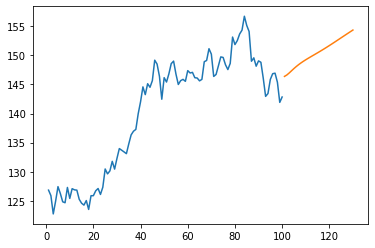

In [121]:
plt.plot(day_new, scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred, scaler.inverse_transform(lst_op))

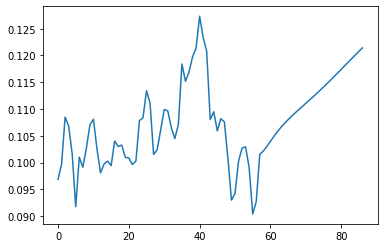

In [122]:
df3 = df1.tolist()
df3.extend(lst_op)
plt.plot(df3[1200:])

In [123]:
df3 = scaler.inverse_transform(df3).tolist()

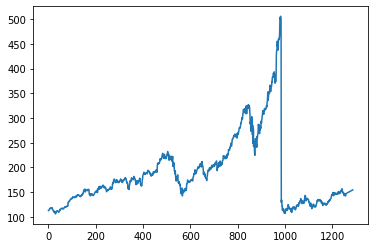

In [124]:
plt.plot(df3)

# Done with this